In [2]:
import torch
import subprocess
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Audio

In [3]:
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

In [6]:
# get path of current file
if not 'notebookDir' in globals():
    notebookDir = os.getcwd()
print('notebookDir: ' + notebookDir)
os.chdir(notebookDir)
os.chdir("text-to-image/vqgan")

notebookDir: /home/user/Documents/Github/Projects/HackaTUM2021


In [1]:
PROMPT = "Seit 2012 bauen wir einen Elektro-Rennwagen. Das Ziel ist, das Zusammenspiel der Subteams Aerodynamik, Batterie, Chassis, eDrive, Fahrdynamik, Fahrwerk und Systemelektronik zu optimieren, um eine bestmögliche Performance mit unserem eSleek auf den Events zu erreichen!"
n=4
PATH="../output/vqgan/gen.png"

In [16]:
cmd = '''python -u main.py test cc12m_32x1024_vitgan.th "''' + PROMPT + '''"''' + ''' --nb-repeats=''' + str(n) + ''' --out-path=''' + PATH + ''' --images-per-row=''' + str(n)

p = subprocess.Popen(cmd, stdout=subprocess.PIPE, shell=True, stderr=subprocess.PIPE)
stdout, stderr = p.communicate()
print(stdout, stderr)

b'Working with z of shape (1, 256, 16, 16) = 65536 dimensions.\nloaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth\nVQLPIPSWithDiscriminator running with hinge loss.\nRestored from vqgan_imagenet_f16_16384.ckpt\n' b''


In [3]:

language = 'en'
speaker = 'lj_16khz'
device = torch.device('cpu')
model, symbols, sample_rate, example_text, apply_tts = torch.hub.load(repo_or_dir='snakers4/silero-models',
                                                                      model='silero_tts',
                                                                      language=language,
                                                                      speaker=speaker,
                                                                      model_math='fp64')
torch.set_default_dtype(torch.float64)
model = model.to(device)  # gpu or cpu
model.eval()

Downloading: "https://github.com/snakers4/silero-models/archive/master.zip" to /home/user/.cache/torch/hub/master.zip
100%|██████████| 136M/136M [00:36<00:00, 3.89MB/s]


RecursiveScriptModule(
  original_name=TTSModel
  (tacotron): RecursiveScriptModule(
    original_name=Tacotron2_jit
    (embedding): RecursiveScriptModule(original_name=Embedding)
    (encoder): RecursiveScriptModule(
      original_name=Encoder
      (convolutions): RecursiveScriptModule(
        original_name=ModuleList
        (0): RecursiveScriptModule(
          original_name=Sequential
          (0): RecursiveScriptModule(
            original_name=ConvNorm
            (conv): RecursiveScriptModule(original_name=Conv1d)
          )
          (1): RecursiveScriptModule(original_name=BatchNorm1d)
        )
        (1): RecursiveScriptModule(
          original_name=Sequential
          (0): RecursiveScriptModule(
            original_name=ConvNorm
            (conv): RecursiveScriptModule(original_name=Conv1d)
          )
          (1): RecursiveScriptModule(original_name=BatchNorm1d)
        )
        (2): RecursiveScriptModule(
          original_name=Sequential
          (0): R

In [5]:
res1 = []
for i in range(round(len(PROMPT)/139)):
    
    audio = apply_tts(texts=PROMPT[i*140:(i+1)*140],
                  model=model,
                  sample_rate=sample_rate,
                  symbols=symbols,
                  device=device)
    #print(list(audio[0].numpy().flatten()))
    
    res1.extend(list(audio[0].numpy().flatten()))
    res1.extend([0]*16000)

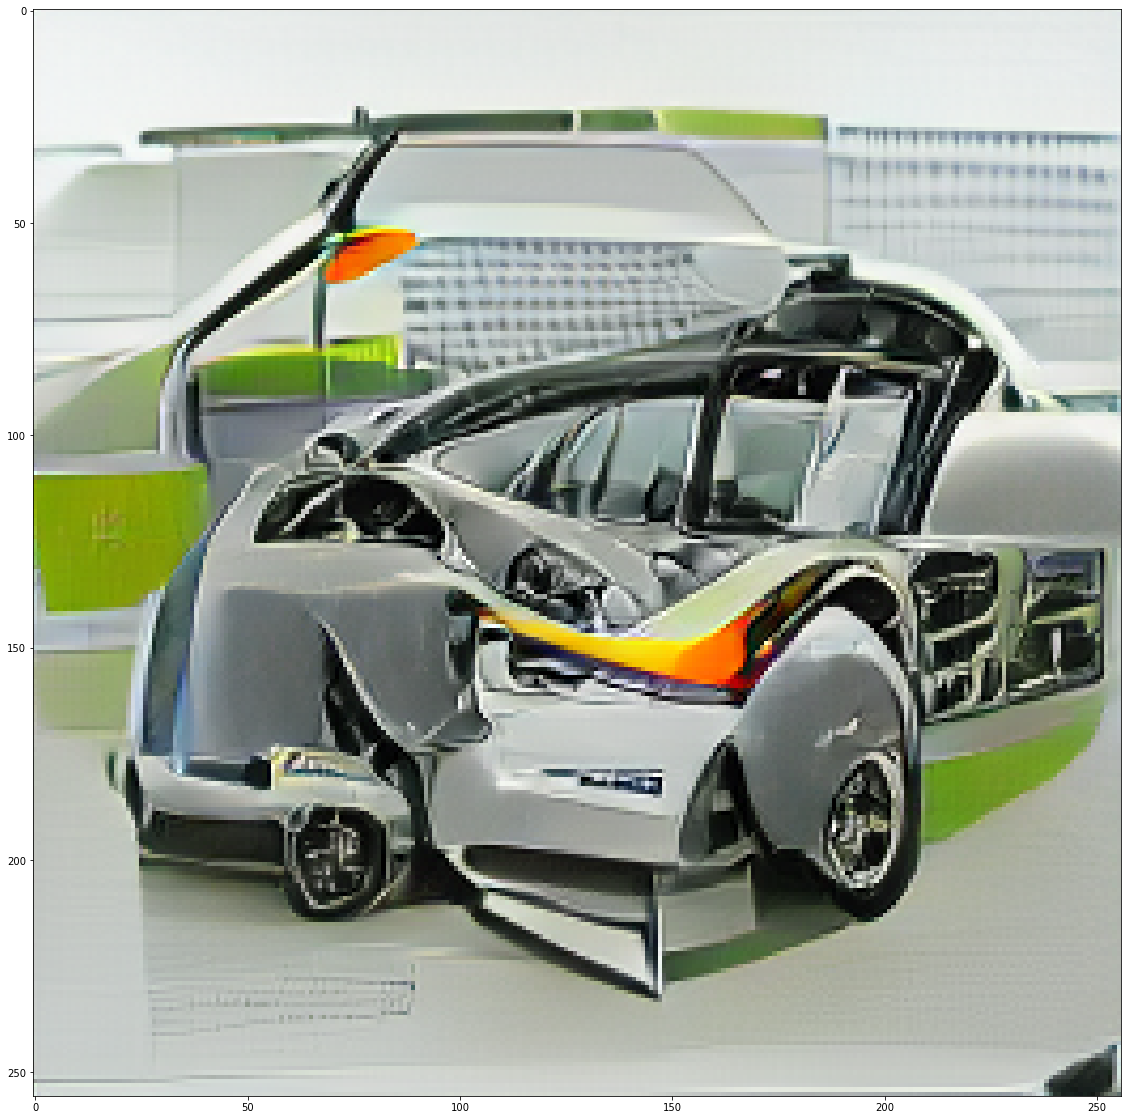

In [6]:

plt.figure(figsize = (20,20))
img = mpimg.imread('gen.png')
imgplot = plt.imshow(img)
plt.show()

Audio(res1, rate=16000)